In [1]:
import os
import re
import sys
from pathlib import Path

import h5py
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scanpy as sc
import skimage
from joblib import Parallel, delayed
from skimage import exposure, io
from tqdm.notebook import tqdm, trange

sc.settings.verbosity = 3

from functools import reduce

import anndata as ad
import scanorama
import seaborn as sns
from matplotlib import cm, colors
from matplotlib.pyplot import rc_context
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import matplotlib 

In [3]:
p_dir = (Path().cwd().parents[0]).absolute()
data_dir = p_dir / "data"

In [4]:
adata_path = data_dir / "metadata" / f"combined_semi_final.h5ad"
adata = sc.read_h5ad(adata_path)

In [5]:
adata.obs

,ROI,Cell,Dataset,leiden,Phenotype_r1,Phenotype_r1_n,Phenotype
0,1,1,LN Donor A,32,Stroma,0,Stroma
1,1,2,LN Donor A,10,Stroma,0,Stroma
2,1,3,LN Donor A,29,Stroma,0,Stroma
3,1,4,LN Donor A,11,Stroma,0,Stroma
4,1,5,LN Donor A,20,nan,1,Stroma
...,...,...,...,...,...,...,...
999965,18,9208,TS Donor E,26,nan,1,myeloid-derived cells
999966,18,9209,TS Donor E,14,B-cells,4,B-cells
999967,18,9210,TS Donor E,19,H3K27me3 + B-cells,7,B-cells
999968,18,9211,TS Donor E,14,B-cells,4,B-cells


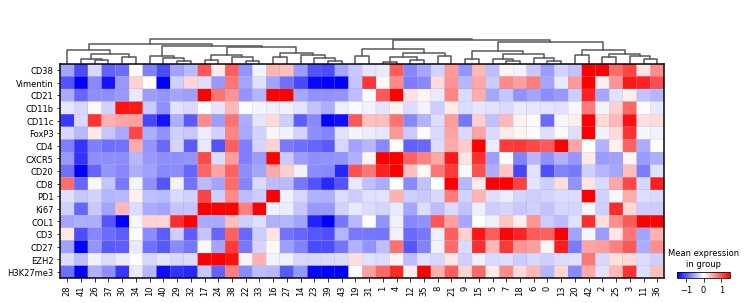

In [12]:
fig, ax = plt.subplots(figsize=(12,5))
sc.pl.matrixplot(adata, adata.var_names, groupby='leiden', cmap='bwr', swap_axes=True, ax=ax,
                 dendrogram=True, vmin=-1.5, vmax=1.5)

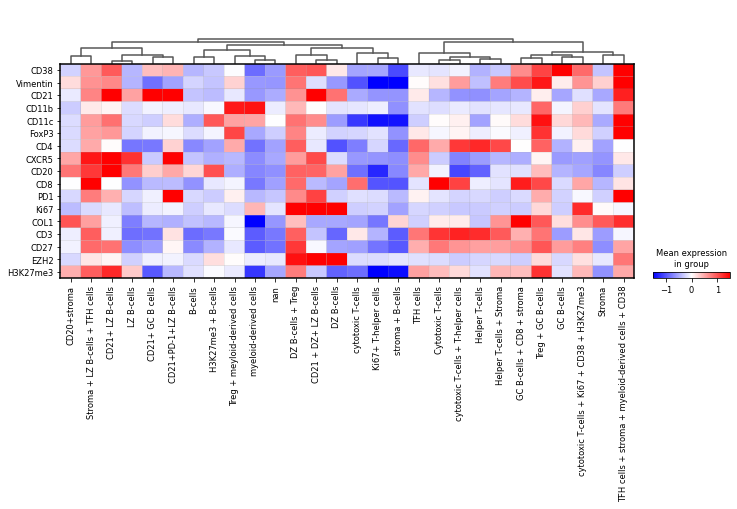

In [13]:
fig, ax = plt.subplots(figsize=(12,5))
sc.pl.matrixplot(adata, adata.var_names, groupby='Phenotype_r1', cmap='bwr', swap_axes=True, ax=ax,
                 dendrogram=True, vmin=-1.5, vmax=1.5)

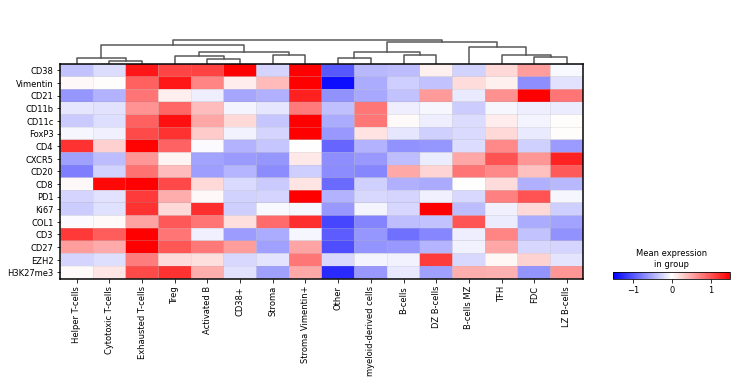

In [14]:
fig, ax = plt.subplots(figsize=(12,5))
sc.pl.matrixplot(adata, adata.var_names, groupby='Phenotype', cmap='bwr', swap_axes=True, ax=ax,
                 dendrogram=True, vmin=-1.5, vmax=1.5)